Best model score = 0.8181818181818182


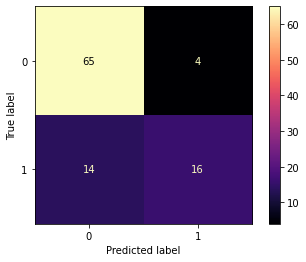


 Classification report for the model is: 

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        69
           1       0.80      0.53      0.64        30

    accuracy                           0.82        99
   macro avg       0.81      0.74      0.76        99
weighted avg       0.82      0.82      0.81        99



In [46]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics


df=pd.read_csv('data-modified.csv')

df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=np.where(df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=='no',0,1)
df[['sex']]=np.where(df[['sex']]=='F',0,1)
df[['address']]=np.where(df[['address']]=='R',0,1)
df[['famsize']]=np.where(df[['famsize']]=='LE3',0,1)
df[['Pstatus']]=np.where(df[['Pstatus']]=='A',0,1)
df[['guardian']]=np.where(df[['guardian']]=='mother',0,1)
df[['Alcuse']]=np.where(df[['Alcuse']]=='low',0,1)
df = df.drop(columns=['school','Mjob','Fjob','reason','address','nursery','higher','Fedu','address'])

X = df.loc[:, 'sex':'absences'].values
y = df.loc[:, 'Alcuse':'Alcuse'].values.ravel()

sc = StandardScaler()
X = sc.fit_transform(X)

               
base_learners = [('bl_1', GaussianNB()),('bl_2', KNeighborsClassifier(n_neighbors=20))             
                ]

clf = StackingClassifier(estimators= base_learners, final_estimator=GaussianNB())
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print('Best model score =',score)

plot_confusion_matrix(clf, X_test, y_test,cmap = 'magma')
plt.show()

print('\n Classification report for the model is: \n')
print(metrics.classification_report(y_test,predictions))

Best model score = 0.7777777777777778


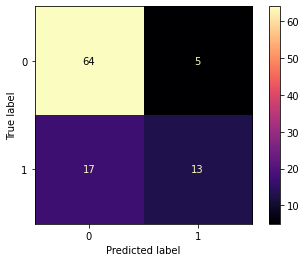


 Classification report for the model is: 

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        69
           1       0.72      0.43      0.54        30

    accuracy                           0.78        99
   macro avg       0.76      0.68      0.70        99
weighted avg       0.77      0.78      0.76        99



In [47]:
base_learners = [('bl_1', GaussianNB()),('bl_2', KNeighborsClassifier(n_neighbors=20))             
                ]

clf = StackingClassifier(estimators= base_learners, final_estimator=KNeighborsClassifier())
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print('Best model score =',score)

plot_confusion_matrix(clf, X_test, y_test,cmap = 'magma')
plt.show()

print('\n Classification report for the model is: \n')
print(metrics.classification_report(y_test,predictions))

Best model score = 0.7272727272727273


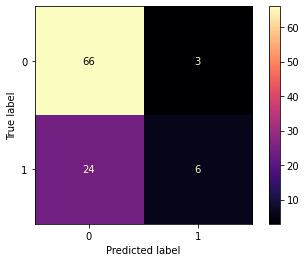


 Classification report for the model is: 

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        69
           1       0.67      0.20      0.31        30

    accuracy                           0.73        99
   macro avg       0.70      0.58      0.57        99
weighted avg       0.71      0.73      0.67        99



In [48]:
base_learners = [('bl_1', GaussianNB()),('bl_2', KNeighborsClassifier(n_neighbors=20))             
                ]

clf = StackingClassifier(estimators= base_learners, final_estimator=LogisticRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print('Best model score =',score)

plot_confusion_matrix(clf, X_test, y_test,cmap = 'magma')
plt.show()

print('\n Classification report for the model is: \n')
print(metrics.classification_report(y_test,predictions))